In [58]:
# Exploring and visualizing the iris database

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
data = pd.read_csv('Iris_Data.csv')

In [61]:
print(data.head(n=4))

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa


In [62]:
print(data.tail(n=5))

     sepal_length  sepal_width  petal_length  petal_width         species
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica


In [63]:
print(f"The database has {data.shape[0]} samples and {data.shape[1]} variables")

The database has 150 samples and 5 variables


In [64]:
print(data.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [65]:
# Creating a dataframe for the petal data

petal_data = data[['petal_length', 'petal_width']]
print(petal_data)

     petal_length  petal_width
0             1.4          0.2
1             1.4          0.2
2             1.3          0.2
3             1.5          0.2
4             1.4          0.2
..            ...          ...
145           5.2          2.3
146           5.0          1.9
147           5.2          2.0
148           5.4          2.3
149           5.1          1.8

[150 rows x 2 columns]


In [66]:
# Removing the prefix Iris- from the species name

#data['species'] = data['species'].str.replace('Iris-', '')

data['species'] = data['species'].apply(lambda r: r.replace('Iris-', ''))
print(data['species'])

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [67]:
data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [68]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [69]:
print(data.groupby('species').mean())

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.418         1.464        0.244
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026


In [70]:
print(data.groupby('species').std())

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa          0.352490     0.381024      0.173511     0.107210
versicolor      0.516171     0.313798      0.469911     0.197753
virginica       0.635880     0.322497      0.551895     0.274650


In [71]:
 result = data.groupby('species').agg(
     {
      'petal_length': ['mean', 'median','std'],
      'petal_width': ['mean', 'median','std']
     }
 )
    
print(result)

           petal_length                  petal_width                 
                   mean median       std        mean median       std
species                                                              
setosa            1.464   1.50  0.173511       0.244    0.2  0.107210
versicolor        4.260   4.35  0.469911       1.326    1.3  0.197753
virginica         5.552   5.55  0.551895       2.026    2.0  0.274650


In [72]:
 result = data.groupby('species').agg(
     {
      x : ['mean', 'median','std'] for x in data.columns if x != 'species'
     }
 )
    
print(result)

           sepal_length                  sepal_width                   \
                   mean median       std        mean median       std   
species                                                                 
setosa            5.006    5.0  0.352490       3.418    3.4  0.381024   
versicolor        5.936    5.9  0.516171       2.770    2.8  0.313798   
virginica         6.588    6.5  0.635880       2.974    3.0  0.322497   

           petal_length                  petal_width                   
                   mean median       std        mean median       std  
species                                                                
setosa            1.464   1.50  0.173511       0.244    0.2  0.107210  
versicolor        4.260   4.35  0.469911       1.326    1.3  0.197753  
virginica         5.552   5.55  0.551895       2.026    2.0  0.274650  


In [73]:
# Displaying Graphs



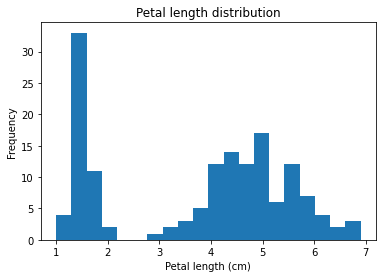

In [74]:
histogram = data['petal_length'].plot.hist(bins=20)

histogram.set(
    title = 'Petal length distribution',
    xlabel = 'Petal length (cm)'
)

plt.show()

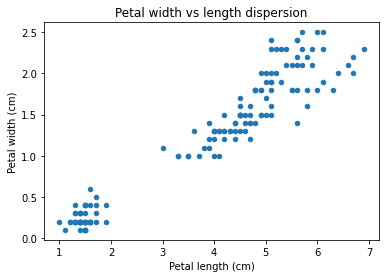

In [75]:
scat = data.plot.scatter('petal_length', 'petal_width')

scat.set(
    title = 'Petal width vs length dispersion',
    xlabel = 'Petal length (cm)',
    ylabel = 'Petal width (cm)'
)

plt.show()

In [76]:
# Separate attributes and target in different dataframes

# data.iloc(lin1:lin2,col1:col2)

attributes = data.iloc[:,:-1]

target = data.iloc[:,-1]

classes = data['species'].unique().tolist()

In [77]:
color_map = ['blue', 'orange', 'grey']

sample_colors = [color_map[classes.index(r)] for r in target]

print(sample_colors)

['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'gr

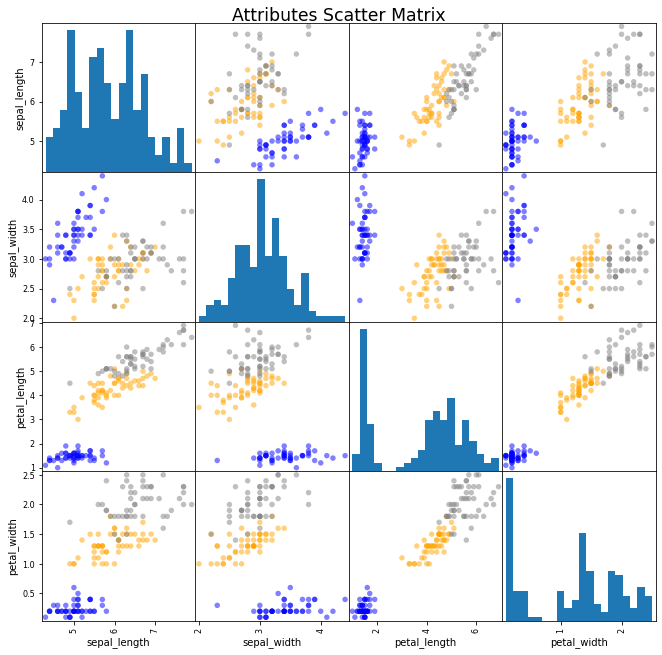

In [78]:
pd.plotting.scatter_matrix(
    attributes,
    c=sample_colors,
    figsize=(11,11),
    marker='o',
    s=30,
    alpha=0.5,
    diagonal='hist',
    hist_kwds={'bins':20}
    )

plt.suptitle('Attributes Scatter Matrix', y=0.9, fontsize='xx-large')
plt.show()

In [79]:
# 3D Dispersion graph between three attributes
x_axis = 'sepal_length'
y_axis = 'petal_length'
z_axis = 'petal_width'

fig = plt.figure(figsize=(15,12))

<Figure size 1080x864 with 0 Axes>

In [80]:
graph3d = fig.add_subplot(111,projection='3d')

In [81]:
graph3d.scatter(
    data[x_axis],
    data[y_axis],
    data[z_axis],
    c=sample_colors,
    marker='o',
    s=40,
    alpha=0.5   
)

plt.show()